In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data 
df = pd.read_csv("Retail_Data_Transactions.csv",parse_dates=["trans_date"])
df.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [3]:
# create a backup of the dataframe
df1 = df

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
customer_id    125000 non-null object
trans_date     125000 non-null datetime64[ns]
tran_amount    125000 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [4]:
#finding the minimum and maximum transaction date
print(df1.trans_date.min(),df1.trans_date.max())

2011-05-16 00:00:00 2015-03-16 00:00:00


In [5]:
df1.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35
1,CS4768,2015-03-15,39
2,CS2122,2013-02-26,52
3,CS1217,2011-11-16,99
4,CS1850,2013-11-20,78


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
customer_id    125000 non-null object
trans_date     125000 non-null datetime64[ns]
tran_amount    125000 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ MB


In [10]:
df1.columns.

dtype('O')

In [11]:
# since the latest date available is 2015-03-16 we will set the present date as 2015-03-17
import datetime as dt 

In [12]:
now = pd.datetime(2015,4,1)
now

datetime.datetime(2015, 4, 1, 0, 0)

In [19]:
import numpy as np

In [30]:
rmf = df1.groupby('customer_id').agg({'trans_date' : lambda x : (now-x.max())/np.timedelta64(1, 'D'),
                                     'customer_id' : lambda x : len(x),        # frequency
                                     'tran_amount' : lambda x : x.sum()})      #monetary

In [31]:
rmf.head()

,trans_date,customer_id,tran_amount
customer_id,,,
CS1112,77.0,15,1012
CS1113,51.0,20,1490
CS1114,48.0,19,1432
CS1115,27.0,22,1659
CS1116,219.0,13,857


In [32]:
rmf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6889 entries, CS1112 to CS9000
Data columns (total 3 columns):
trans_date     6889 non-null float64
customer_id    6889 non-null int64
tran_amount    6889 non-null int64
dtypes: float64(1), int64(2)
memory usage: 215.3+ KB


In [33]:
rmf.rename(columns={'trans_date':'regency',
                   'customer_id': 'frequency',
                   'tran_amount':'monetary_value'}, inplace=True)

In [34]:
rmf.head()

,regency,frequency,monetary_value
customer_id,,,
CS1112,77.0,15,1012
CS1113,51.0,20,1490
CS1114,48.0,19,1432
CS1115,27.0,22,1659
CS1116,219.0,13,857


In [44]:
#chech in the original dataframe the frequency and count
print("Count is :{} , total  amount is {}" .format(df[df["customer_id"]=='CS1113'].count()[1],df[df["customer_id"]=='CS1113'].sum()[1]))

Count is :20 , total  amount is 1490


In [46]:
quartiles = rmf.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      regency  frequency  monetary_value
0.25     38.0       14.0           781.0
0.50     69.0       18.0          1227.0
0.75    127.0       22.0          1520.0 <class 'pandas.core.frame.DataFrame'>


In [47]:
quartiles = quartiles.to_dict()

In [48]:
quartiles

{'regency': {0.25: 38.0, 0.5: 69.0, 0.75: 127.0},
 'frequency': {0.25: 14.0, 0.5: 18.0, 0.75: 22.0},
 'monetary_value': {0.25: 781.0, 0.5: 1227.0, 0.75: 1520.0}}

In [49]:
# creating fuction of RFM
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1 

In [59]:
rfmSeg = rmf 

In [60]:
rfmSeg.columns

Index(['regency', 'frequency', 'monetary_value'], dtype='object')

In [61]:
rfmSeg['R_Quartile'] = rfmSeg['regency'].apply(RClass, args=('regency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

In [62]:
rfmSeg.head()

,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
customer_id,,,,,,
CS1112,77.0,15,1012,3,3,3
CS1113,51.0,20,1490,2,2,2
CS1114,48.0,19,1432,2,2,2
CS1115,27.0,22,1659,1,2,1
CS1116,219.0,13,857,4,4,3


In [98]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [96]:
#rfmSeg['RFMClass'] = rfmSeg[["R_Quartile"]].apply(lambda x: ''.join(str(x)), axis = 1) \
 #                           + rfmSeg[["F_Quartile"]].apply(lambda x: ''.join(str(x)), axis = 1) \
  #                          + rfmSeg[["M_Quartile"]].apply(lambda x: ''.join(str(x)), axis = 1)

In [99]:
rfmSeg.head()

,customer_id,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
0,CS1112,77.0,15,1012,3,3,3,333,9
1,CS1113,51.0,20,1490,2,2,2,222,6
2,CS1114,48.0,19,1432,2,2,2,222,6
3,CS1115,27.0,22,1659,1,2,1,121,4
4,CS1116,219.0,13,857,4,4,3,443,11


In [100]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False])

,customer_id,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
3548,CS4660,26.0,33,2527,1,1,1,111,3
3496,CS4608,16.0,32,2449,1,1,1,111,3
4443,CS5555,25.0,31,2439,1,1,1,111,3
3428,CS4540,16.0,32,2361,1,1,1,111,3
3886,CS4998,25.0,34,2358,1,1,1,111,3
2158,CS3270,19.0,33,2349,1,1,1,111,3
3634,CS4746,20.0,31,2337,1,1,1,111,3
3443,CS4555,30.0,33,2331,1,1,1,111,3
1204,CS2316,19.0,33,2330,1,1,1,111,3
4175,CS5287,18.0,32,2307,1,1,1,111,3


In [66]:
rfmSeg.reset_index(inplace=True)
rfmSeg.head()

,customer_id,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,CS1112,77.0,15,1012,3,3,3,333
1,CS1113,51.0,20,1490,2,2,2,222
2,CS1114,48.0,19,1432,2,2,2,222
3,CS1115,27.0,22,1659,1,2,1,121
4,CS1116,219.0,13,857,4,4,3,443


In [88]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value'], ascending=[True, False]).head()

,customer_id,regency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score
3548,CS4660,26.0,33,2527,1,1,1,111,3
3496,CS4608,16.0,32,2449,1,1,1,111,3
4443,CS5555,25.0,31,2439,1,1,1,111,3
3428,CS4540,16.0,32,2361,1,1,1,111,3
3886,CS4998,25.0,34,2358,1,1,1,111,3


In [89]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean().head()

RFMClass
111    1817.589041
112    1467.318182
113    1142.750000
121    1597.562500
122    1401.095930
Name: monetary_value, dtype: float64

In [69]:
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
print(rfmSeg.head(), rfmSeg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 9 columns):
customer_id       6889 non-null object
regency           6889 non-null float64
frequency         6889 non-null int64
monetary_value    6889 non-null int64
R_Quartile        6889 non-null int64
F_Quartile        6889 non-null int64
M_Quartile        6889 non-null int64
RFMClass          6889 non-null object
Total Score       6889 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 484.5+ KB
  customer_id  regency  frequency  monetary_value  R_Quartile  F_Quartile  \
0      CS1112     77.0         15            1012           3           3   
1      CS1113     51.0         20            1490           2           2   
2      CS1114     48.0         19            1432           2           2   
3      CS1115     27.0         22            1659           1           2   
4      CS1116    219.0         13             857           4           4   

   M_Quartile RFMClas

In [70]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean()

Total Score
3     1817.589041
4     1735.154851
5     1595.800248
6     1466.662252
7     1264.107820
8     1136.062280
9      892.495146
10     818.934871
11     649.496350
12     501.283636
Name: monetary_value, dtype: float64

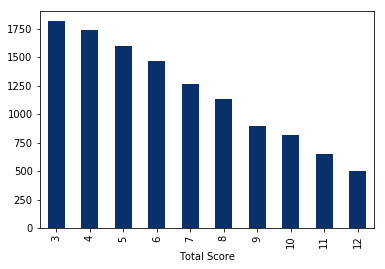

In [72]:
rfmSeg.groupby('Total Score').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

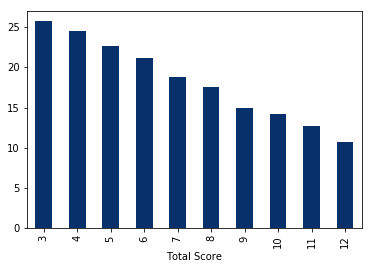

In [73]:
rfmSeg.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

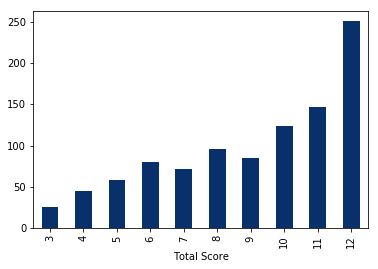

In [75]:
rfmSeg.groupby('Total Score').agg('regency').mean().plot(kind='bar', colormap='Blues_r')

In [76]:
response = pd.read_csv("Retail_Data_Response.csv")

In [77]:
response.sort_values('customer_id' , inplace=True)

In [78]:
response.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [79]:
rfmSeg.sort_values('customer_id', inplace=True)

In [80]:
mergred_data = pd.merge(rfmSeg,response, on='customer_id')

In [81]:
mergred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6884 entries, 0 to 6883
Data columns (total 10 columns):
customer_id       6884 non-null object
regency           6884 non-null float64
frequency         6884 non-null int64
monetary_value    6884 non-null int64
R_Quartile        6884 non-null int64
F_Quartile        6884 non-null int64
M_Quartile        6884 non-null int64
RFMClass          6884 non-null object
Total Score       6884 non-null int64
response          6884 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 591.6+ KB


Text(0,0.5,'Proportion of Responders')

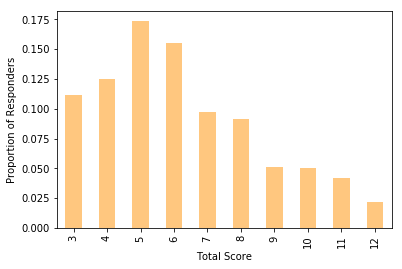

In [82]:
ax=mergred_data.groupby('Total Score').agg('response').mean().plot(kind='bar', colormap='copper_r')
ax.set_xlabel("Total Score")
ax.set_ylabel("Proportion of Responders")

In [86]:
a = mergred_data.groupby('Total Score').agg('response').mean()

Total Score
3     0.111872
4     0.125000
5     0.173697
6     0.154967
7     0.097156
8     0.091657
9     0.050971
10    0.050204
11    0.041971
12    0.022018
Name: response, dtype: float64